<a href="https://colab.research.google.com/github/MatthewMandhyan/Public/blob/main/Copy_of_AB_F25_Final_Project_Template_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group and Student Name(s)

Matthew Mandhyan
mdm16

# Final Project Intro

This notebook contains three sections for you to complete your final project:
1. Data Inspection and Exploratory Data Analysis
2. Explanatory Model
3. Predictive Models

In each section, we provide detailed instructions for what we expect you to complete, as well as the corresponding point allocation. We have included a single code cell for you to begin working. Please add code cells and markdown cells as needed and as appropriate!

Keep in mind that your final should look like a report: code cells should be used for generating output and commentary should be in markdown cells. Steps that should be answered by using code are numbered and given in black. Questions that should be answered using a markdown cell are in purple and bulleted.

**We will deduct points if you answer the questions given in purple in a code cell.**











# Problem Description and Data Dictionary

You are an analyst at a credit card company. Credit card fraud is an important problem, and the company needs you to develop a model for detecting and preventing credit card fraud, while maximizing customer satisfaction and minimizing the financial losses associated with erroneous predictions.

You have access to a dataset of recent customer transactions, where you know whether or not the transaction was fraudulent. Using this, you should:
1. Identify common features of fraudulent transactions.
2. Develop a predictive model that can accurately identify and flag potential fraudulent transactions.

The data dictionary is as follows, where the outcome variable is *fraud*:

| Variable                       | Description                                                                                                                                                                                                                                                              |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| distance_from_home             | Distance between the transaction location and the cardholder's home address. A higher value may indicate that the cardholder is not present during the transaction, potentially raising suspicion.                                                                       |
| distance_from_last_transaction | Distance between the current transaction location and the location of the cardholder's last transaction. A large distance between consecutive transactions may suggest that the transactions are suspicious, especially if the time between them is short.               |
| ratio_to_median_purchase_price | Ratio of the transaction amount to the median purchase price for the cardholder. A higher ratio may indicate an unusually large transaction, which could be a sign of fraud.                                                                                             |
| repeat_retailer                | Binary variable indicating whether the transaction is being made at a retailer where the cardholder has previously made purchases (1) or not (0). Transactions with new retailers might be considered riskier than those with familiar retailers.                        |
| used_chip                      | Binary variable indicating whether the transaction was made using the chip on the card (1) or not (0). Chip transactions generally have a higher level of security than those made with magnetic stripes, so a non-chip transaction might be considered more suspicious. |
| used_pin_number                | Binary variable indicating whether the cardholder used a PIN during the transaction (1) or not (0). Transactions without a PIN are generally considered riskier, as the cardholder's identity is not verified.                                                           |
| online_order                   | Binary variable indicating whether the transaction was made online (1) or in person (0). Online transactions can be more susceptible to fraud, as the cardholder is not physically present to verify their identity.                                                     |
| fraud                          | Binary variable indicating whether the transaction is fraudulent (1) or not (0).                                                                                                                                                                                         |

# Section 0: Import packages and the dataset

Import packages as needed and read the dataset. (The dataset link is on the project page.)



In [ ]:
!pip install dmba

from dmba.metric import regressionSummary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ashish-cell/BADM-211-FA21/main/Data/fraud.csv")

# Section 1: Dataset Inspection, Exploratory Data Analysis, and Preprocessing (44 points)

Complete the following steps and answer the following questions. For each step, please make sure to have one (or more) code cells and then create a markdown cell immediately following it in which to answer the question.

In this section, point allocations for each step will be based on both your code and response to the question.

**Data Inspection and Preprocessing** (20 points)

1. (*1 pt)* Print the first five rows.  

* <font color=purple> Name three categorical and three numerical variables.
Numerical: Distance from Home, Distance from Last Purchase, Ratio to Mediam Purchase Price
Categorical: Repeat Retailer, Used Chip, Online Order </font>

2. (*2 pts)* Print the descriptive statistics.

* <font color=purple> Describe 2-3 insights from this output. Median Distance from Home is 9.967,The Max Distance from Transaction is 11851.11, The Min value of Distance from Home is 0.004874 </font>

3. (*1 pt)* Print datatypes of the columns.

4. (*4 pts)* Use `groupby()` to show summary statistics for two numerical variables across different values of (at least) one categorical variable. (This simply asks for one `groupby` statement.)

* <font color=purple>What insights do you gain from this output? raudulent transactions (fraud=1) tend to occur much further from home on average (mean of 65.88) compared to non-fraudulent ones (mean of 22.84). The maximum distance is also significantly higher for fraudulent transactions.</font>

5. (*2 pts)* For two categorical variables of your choice, show the *proportion* of categories (AKA values) that each takes.

* <font color=purple>What can be said about the data based on these outputs? Around 2/3s of our data used a chip and/or ordered online</font>

6. (*2 pts)* Check for missing values and handle them appropriately.

* <font color=purple>Are there any missing values in the data? If yes, which variable had the most missing values? Yes there are missing values. Distance from Home has the most missing values at 5</font>

7. (*2 pts)* Check for duplicate rows and handle them appropriately.

* <font color=purple>Are there any duplicate rows? If yes, how many? No duplicate rows</font>

8. (*2 pts)* Show 5 rows of the data. By looking at the output you just generated, are there any variables that do *not* contain useful or relevant information about records? If so, be sure to remove them from the data. You may choose to remove multiple variables.
* <font color=purple> All variables are relevant to accuractly calculating if transactions are fraud </font>

9. (*4 pts)* Identify what the outcome variable is. Depending on the variable type, provide summary statistics or the distribution of the outcome variable. If your outcome variable is a categorical variable, convert the text values to 0/1.

* <font color=purple>Is this a regression or classification problem? Why?This is a classification problem as we are not trying to predict a value but rather classify whether a transaction will be consider fraud or not</font>

**Data Visualization** (18 points)

*For this section, you can choose which variables you want to visualize. When completing this section, we encourage you to think about the relationships you are trying to explore and what you will ultimately be predicting.*

*After each visualization, you should describe them following the I-N-I model used in the miniproject. In particular, for each data visualization, write three sentences describing the purpose of the visualization you selected, any patterns shown by the visualization, and the implication for the organization.*

10. (*6 pts)* Draw a scatterplot.

* <font color=purple>Comment on your scatterplot. The distinct clustering and spread suggest that  distance_from_home is an important features. As distance from home increases we see the number of Fraud transactions increase.</font>

11. (*6 pts)* Draw a histogram.

* <font color=purple>Comment on your histogram. This visual separation confirms that ratio_to_median_purchase_price is a strong indicator of fraud. Transactions with a high ratio are more likely to be fraudulent, suggesting that monitoring unusually large purchases relative to a customer's history could be an effective strategy for fraud detection. </font>

12. (*6 pts)* Draw a bar chart. Use mean as the summary statistic.

* <font color=purple>Comment on the bar chart. The elevated mean for fraudulent online transactions suggests that online platforms might be more susceptible to fraud involving unusually high transaction amounts relative to a customer's history. </font>

**Data Preprocessing** (6 points)

13. (*3 pts)* Dummy code your categorical variables for a decision tree model.

* <font color=purple>How many variables are in the resulting dataframe? 7 </font>

14. (*3 pts)* Dummy code your categorical variables for a linear model (MLR or logistic regression).

* <font color=purple>How many variables are in the resulting dataframe? 7 </font>



In [ ]:
# Your code here
# Create as many additional cells as needed
#Question 1:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,yes,yes,no,no,1
1,10.829943,0.175592,1.294219,yes,no,no,no,1
2,5.091079,0.805153,0.427715,yes,no,no,yes,1
3,2.247564,5.600044,0.362663,yes,yes,no,yes,1
4,44.190936,0.566486,2.222767,yes,yes,no,yes,1


In [ ]:
#Question 2
display(df.describe())

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
count,999995.000000,999998.000000,999994.000000,1000000.000000
mean,26.628579,5.036528,1.824181,0.088124
std,65.390202,25.843118,2.799593,0.283475
min,0.004874,0.000118,0.004399,0.000000
25%,3.878056,0.296670,0.475671,0.000000
50%,9.967839,0.998656,0.997711,0.000000
75%,25.743999,3.355779,2.096372,0.000000
max,10632.723670,11851.104560,267.802942,1.000000


In [ ]:
#Question 3:
display(df.dtypes)

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,object
used_chip,object
used_pin_number,object
online_order,object
fraud,int64


In [ ]:
#Question 4:
df.groupby('fraud')[['distance_from_home', 'ratio_to_median_purchase_price']].describe()

distance_from_home                                             \
                   count       mean         std       min       25%   
fraud                                                                 
0               911872.0  22.835143   52.842804  0.004874  3.828809   
1                88123.0  65.881994  133.930363  0.025847  4.582366   

                                          ratio_to_median_purchase_price  \
             50%         75%          max                          count   
fraud                                                                      
0       9.673867   24.158234   8777.13642                       911872.0   
1      15.370559  100.584570  10632.72367                        88122.0   

                                                                               
           mean       std       min       25%       50%       75%         max  
fraud                                                                          
0      1.423683  1.946123  0.004399  0.449774  0.913978  1.789009  267.802942  
1      5.968466  5.560150  0.011966  3.183960  5.048909  7.303941  266.689692

In [ ]:
#Question 5:
display(df['online_order'].value_counts(normalize=True))
display(df['used_chip'].value_counts(normalize=True))

,proportion
online_order,
yes,0.650552
no,0.349448


,proportion
used_chip,
no,0.649601
yes,0.350399


In [ ]:
#Question 6:
print(df.isna().sum())

distance_from_home                5
distance_from_last_transaction    2
ratio_to_median_purchase_price    6
repeat_retailer                   0
used_chip                         1
used_pin_number                   1
online_order                      2
fraud                             0
dtype: int64


In [ ]:
#Question 6b:
df.dropna(inplace=True)
print(df.isna().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [ ]:
#Question 7:
print(df.duplicated().sum())

0


In [ ]:
#Questoin 8:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,yes,yes,no,no,1
1,10.829943,0.175592,1.294219,yes,no,no,no,1
2,5.091079,0.805153,0.427715,yes,no,no,yes,1
3,2.247564,5.600044,0.362663,yes,yes,no,yes,1
4,44.190936,0.566486,2.222767,yes,yes,no,yes,1


In [ ]:
#Question 9:
display(df['fraud'].value_counts())
display(df['fraud'].value_counts(normalize=True))
df = pd.get_dummies(
    df,
    columns=['repeat_retailer', 'used_chip', 'online_order', 'used_pin_number'],
    drop_first=True
)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,count
fraud,
0,911864
1,88120


,proportion
fraud,
0,0.911879
1,0.088121


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud,repeat_retailer_yes,used_chip_yes,online_order_yes,used_pin_number_yes
0,57.877857,0.311140,1.945940,1,1,1,0,0
1,10.829943,0.175592,1.294219,1,1,0,0,0
2,5.091079,0.805153,0.427715,1,1,0,1,0
3,2.247564,5.600044,0.362663,1,1,1,1,0
4,44.190936,0.566486,2.222767,1,1,1,1,0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


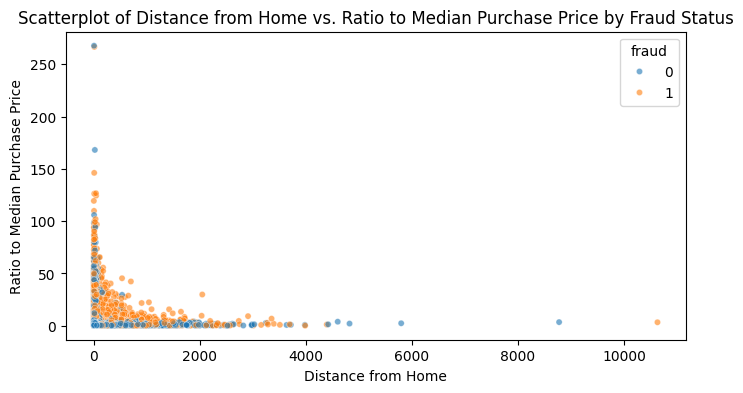

In [ ]:
#Question 10: Scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x='distance_from_home',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    alpha=0.6,
    s=20
)
plt.title('Scatterplot of Distance from Home vs. Ratio to Median Purchase Price by Fraud Status')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()

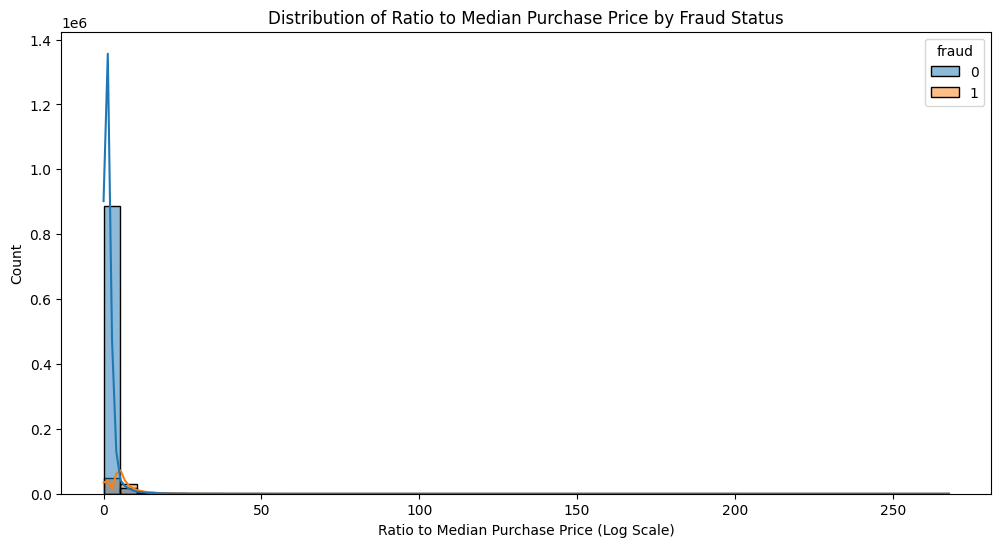

In [ ]:
#Question 11: Histogram
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='ratio_to_median_purchase_price',
    hue='fraud',
    bins=50,
    kde=True
)
plt.title('Distribution of Ratio to Median Purchase Price by Fraud Status')
plt.xlabel('Ratio to Median Purchase Price (Log Scale)')
plt.ylabel('Count')
plt.show()

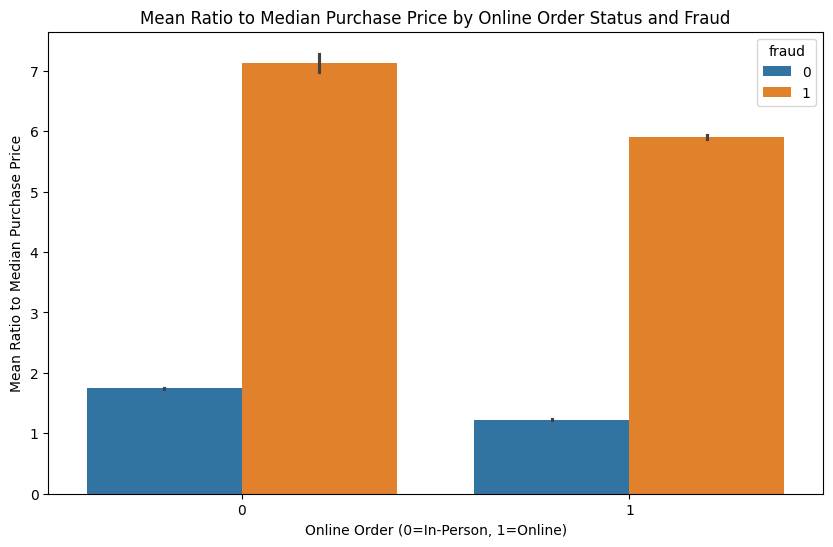

In [ ]:
#Question 12: Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='online_order_yes',
    y='ratio_to_median_purchase_price',
    hue='fraud',
)
plt.title('Mean Ratio to Median Purchase Price by Online Order Status and Fraud')
plt.xlabel('Online Order (0=In-Person, 1=Online)')
plt.ylabel('Mean Ratio to Median Purchase Price')
plt.show()

In [ ]:
#Question 13:
df_tree = df.copy()
num_vars_tree = df_tree.drop(columns=['fraud']).shape[1]
print(num_vars_tree)


7


In [ ]:
#Question 14:
df_mlr = df.copy()
num_vars_mlr = df_mlr.drop(columns=['fraud']).shape[1]
print(num_vars_mlr)

7


# Section 2: Explanatory Modeling   (30 points)

1. *(15 pts)* Fit an explanatory model using the whole dataset (after dropping irrelevant predictors), and print its output.
* *(5 pts)* <font color=purple> Are any of the variables insignificant? Which ones? None of the variables are insignificant all variables have p value < .05</font>
* *(10 pts)* <font color=purple> Interpret the coefficients of the independent variables that *are* significant. Do this for at least three variables, doing this for at least one dummy variable and one numerical variable.
Note fraud=1
For every 1 extra unit a transaction is from the user's home the model output increase by .0146 signaling a positive correlation between distance from home and fraud.
Higher Transaction cost relative to mediam purchase prices also signals a positive correlation with the chance of credit card fraud. The model says that for every 1 unit of the ratio the model's output goes up by .8289
For online orders if the user purchases online the model output and subsequent chance of fraud increases by a significant portion. The model's output increases by 6.2011 if the user order online</font>


In [ ]:
# Your code here
# Create as many additional cells as needed
formula = 'fraud ~ distance_from_home + distance_from_last_transaction + ratio_to_median_purchase_price + repeat_retailer_yes + used_chip_yes + used_pin_number_yes + online_order_yes'
model = smf.logit(formula=formula, data=df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.140614
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               999984
Model:                          Logit   Df Residuals:                   999976
Method:                           MLE   Df Model:                            7
Date:                Sun, 30 Nov 2025   Pseudo R-squ.:                  0.5284
Time:                        04:42:28   Log-Likelihood:            -1.4061e+05
converged:                       True   LL-Null:                   -2.9816e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -9.8192      0.041   -238.717    

# Section 3: Predictive Modeling (45 points)
**Data Preprocessing** (10 points)
1. *(3 pts)* Split the data into `X` and `y`.

2. *(4 pts)* Create training and test sets, with 80\% of the data in the training set and 20\% in the test set, and save them as *train_X*, *test_X*, *train_y*, and *test_y*.
* *(3 pts)* <font color=purple> Why do we partition data when doing predictive modeling? We partition data in predictive modeling to ensure that our model can generalize to new, unseen data rather than just memorizing the training data.</font>

**Fitting and Predicting the Models** (30 points for Regression, 35 points for Classification)

Next, you will create three predictive models:
  * `Model1`: logistic regression
  * `Model2`: decision tree (with or without grid search)
  * `Model3`: random forest (with or without grid search)

Repeat steps 3 through 6 for each model.

3. *(2 pts x 3)* Fit the predictive model.

4. *(3 pts x 2)* Print the model coefficients (for `Model1`) or visualize the tree (for `Model2`). No output for `Model3`.

5. *(3 pts x 3)* Make predictions on the training and test sets.

6. *(2 pts x 3)* Display the confusion matrix.

8. *(5 pts)* Plot the ROC curves (in a single plot) for all three models.

* *(3 pts)* <font color=purple> Which model performs the best? What are you basing this off of? Decision Tree and Random Forest preformed the best. I am basing this off the ROC curve where we see the 2 lines form a almost perfect 90 degree angle hugging the topleft corner signal a better model</font>


In [ ]:
# Your code here
# Create as many additional cells as needed
X = df.drop(columns=['fraud'])
y = df['fraud']

test_X, train_X, test_y, train_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model 1: Logistic Regression
model1 = LogisticRegression()
model1.fit(train_X, train_y)
print(model1.coef_)


[[  0.01493042   0.02613477   0.81764144  -0.57985708  -1.01784032
    6.01805426 -11.13914033]]


In [ ]:
y_train_pred_prob = model1.predict_proba(train_X)[:,1]
y_test_pred_prob = model1.predict_proba(test_X)[:,1]

In [ ]:
y_train_pred = model1.predict(train_X)
y_test_pred = model1.predict(test_X)

In [ ]:
print(f"Train Confusion Matrix \n{confusion_matrix(train_y, y_train_pred)}")
print(f"Test Confusion Matrix \n{confusion_matrix(test_y, y_test_pred)}")

Train Confusion Matrix 
[[180899   1319]
 [  7413  10366]]
Test Confusion Matrix 
[[724348   5298]
 [ 29205  41136]]


In [ ]:
y_train_pred_prob = model1.predict_proba(train_X)[:,1]
y_test_pred_prob = model1.predict_proba(test_X)[:,1]
fpr_log, tpr_log, _ = roc_curve(test_y, y_test_pred_prob)
auc_log = roc_auc_score(test_y, y_test_pred_prob)

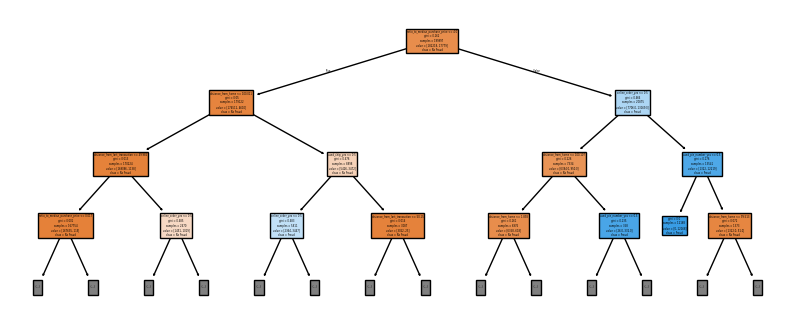

In [ ]:
#Model 2:Decision Tree
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(train_X, train_y)
plt.figure(figsize=(10,4))
plot_tree(model2, feature_names=X.columns, class_names=['No Fraud','Fraud'], max_depth=3, filled=True)
plt.show()

In [ ]:
y_train_pred_dt = model2.predict(train_X)
y_test_pred_dt = model2.predict(test_X)
print(f"Train Confusion Matrix \n{confusion_matrix(train_y, y_train_pred_dt)}")
print(f" Test Confusion Matrix \n{confusion_matrix(test_y, y_test_pred_dt)}")

Train Confusion Matrix 
[[182043    175]
 [   189  17590]]
 Test Confusion Matrix 
[[728905    741]
 [   896  69445]]


In [ ]:
y_train_pred_prob_dt = model2.predict_proba(train_X)[:,1]
y_test_pred_prob_dt = model2.predict_proba(test_X)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(test_y, y_test_pred_prob_dt)
auc_dt = roc_auc_score(test_y, y_test_pred_prob_dt)

In [ ]:
#Model 3: Random Forest
model3 = RandomForestClassifier()
model3.fit(train_X, train_y)
y_train_pred_rf = model3.predict(train_X)
y_test_pred_rf = model3.predict(test_X)

In [ ]:
print(f" Train Confusion Matrix \n{confusion_matrix(train_y, y_train_pred_rf)}")
print(f"Test Confusion Matrix \n{confusion_matrix(test_y, y_test_pred_rf)}")

 Train Confusion Matrix 
[[182218      0]
 [     4  17775]]
Test Confusion Matrix 
[[729646      0]
 [   620  69721]]


In [ ]:
y_test_pred_prob_rf = model3.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_test_pred_prob_rf)
auc_rf = roc_auc_score(test_y, y_test_pred_prob_rf)

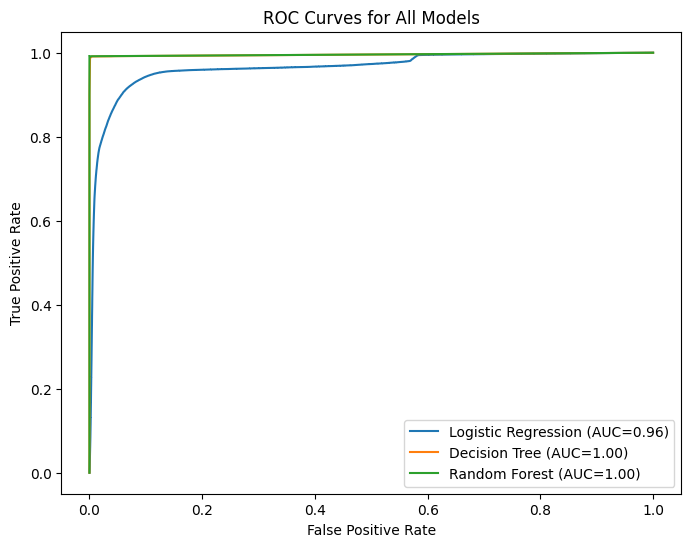

In [ ]:
#ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={auc_log:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# Section 4: Computing the value of your work (15 Points)

In this section, you will compare the performance of two models:
* a naive model (in which the predicted class is simply the *majority class* in the data used to fit the model; and
* one of your models from above.

1. *(4 pts)* For each model (naive and chosen), define the number of true positives, false positives, true negatives, and false negatives for the test set.

**Problem Setup**

For your dataset, the average costs of misclassification and value of an accurate prediction are as follows:
- Each false negative prediction costs you \$500.
- Each false positive prediction costs you \$200 worth of customer dissatisfaction due to a declined transaction.
- If you correctly decline a fraudulent transaction (TP), client satisfaction is worth \$20 dollars.
- Each TN prediction has neither a cost nor a benefit.

**Value Calculation**
2. *(6 pts)* Using the values you defined above, as well as the information provided regarding the costs and benefits of your predictions, calculate the average return from using the naive model and from your chosen model. Make sure to display the output for each.

* *(5 pts)* <font color=purple> What is the average benefit from using your model instead of a naive model? (If you don't see there is a benefit, you may want to choose a different model or double-check your analysis!) The benefit I found was: 20331120</font>

In [ ]:
# Your code here
# Create as many additional cells as needed
y_pred_naive = np.repeat(train_y.mode()[0], len(test_y))
y_pred_model = model1.predict(test_X)
tn_n, fp_n, fn_n, tp_n = confusion_matrix(test_y, y_pred_naive).ravel()
tn_m, fp_m, fn_m, tp_m = confusion_matrix(test_y, y_pred_model).ravel()

print(f"Confusion Matrix of Naive Model \n{confusion_matrix(test_y, y_pred_naive)}")
print(f"Confusion Matrix of Model1 \n{confusion_matrix(test_y, y_pred_model)}")

naive_return = (
    tp_n * 20 +
    fp_n * (-200) +
    fn_n * (-500) +
    tn_n * 0
)

print(f"Naive Return: {naive_return}")
model_return = (
    tp_m * 20 +
    fp_m * (-200) +
    fn_m * (-500) +
    tn_m * 0
)
print(f"Model Return: {model_return}")

benefit = model_return - naive_return
print("Average benefit of chosen model over naive:", benefit)

Confusion Matrix of Naive Model 
[[729646      0]
 [ 70341      0]]
COnfusion Matrix of Model1 
[[724348   5298]
 [ 29205  41136]]
Naive Return: -35170500
Model Return: -14839380
Average benefit of chosen model over naive: 20331120
